<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371527 entries, 0 to 371526
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   index                371527 non-null  int64         
 1   dateCrawled          371527 non-null  datetime64[ns]
 2   name                 371512 non-null  object        
 3   seller               371527 non-null  object        
 4   offerType            371527 non-null  object        
 5   price                371527 non-null  int64         
 6   abtest               371527 non-null  object        
 7   vehicleType          333658 non-null  object        
 8   yearOfRegistration   371527 non-null  int64         
 9   gearbox              351318 non-null  object        
 10  powerPS              371527 non-null  int64         
 11  model                351043 non-null  object        
 12  kilometer            371527 non-null  int64         
 13  monthOfRegistr

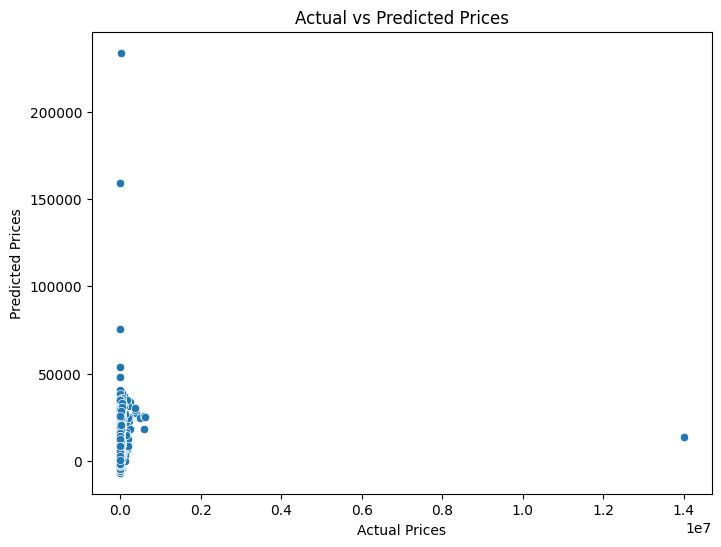

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/Copy of _autos - regression1.xlsx"  # Update with the correct file path
df = pd.read_excel(file_path)  # Adjust the delimiter if needed

# Display basic information
print(df.info())

# Drop unnecessary columns that do not contribute to price prediction
df = df.drop(columns=['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'dateCreated',
                      'nrOfPictures', 'postalCode', 'lastSeen'])

# Handle missing values
df = df.dropna()

# Convert categorical variables using Label Encoding
categorical_columns = ['gearbox', 'fuelType', 'brand', 'notRepairedDamage', 'vehicleType', 'model']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define feature variables (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

# Plot actual vs predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
